In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from math import comb

plt_style = {"text.usetex": True,
             "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
             "axes.spines.right" : False,
             "axes.spines.top" : False,
             "font.size": 22,
             "savefig.dpi": 600,
             "savefig.bbox": 'tight'
            }

In [2]:
seeds = np.loadtxt('./data/lec15/seeds_dataset.txt')

The above data set is from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/seeds). There may be equivalent examples in Materials Science or Chemical Engineering but let us use that for the assignments.

From the description of the data on the website, it appears that there's some random design in the selection of samples. 



In [3]:
import pandas as pd

data = pd.DataFrame(seeds[:,:-1], columns = ['A', 'P', 'C', 'L', 'W', 'Asym', 'L_groove'])
labels = seeds[:,-1]
data.head()

,A,P,C,L,W,Asym,L_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## PCA using scikit-learn

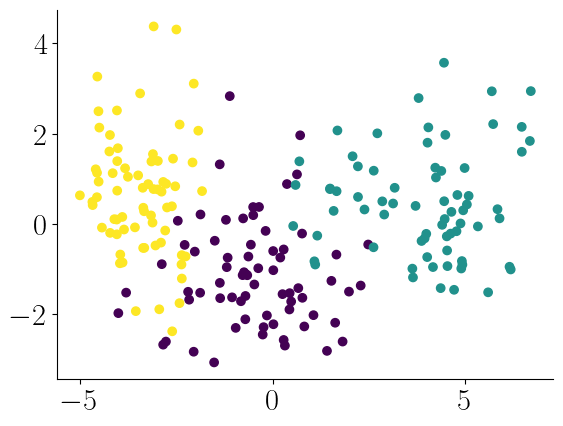

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lambda_i = pca.fit_transform(data.values)

with plt.style.context(plt_style):
    fig, ax = plt.subplots()
    ax.scatter(lambda_i[:,0], lambda_i[:,1], c=labels)
    plt.savefig('./figures/lec15_1.pdf')
    plt.show()

In [5]:
# verify diagonialization of covariance of lambda values
np.cov(lambda_i, rowvar=False)

array([[ 1.07933269e+01, -2.33731163e-16],
       [-2.33731163e-16,  2.12945512e+00]])

## Clustering using k-means

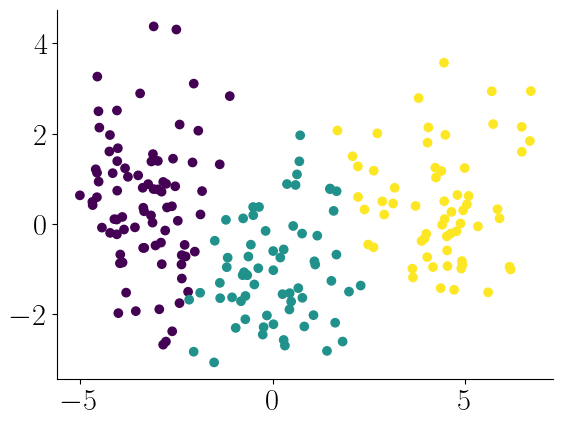

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, # set 3 centroids
                random_state=0, 
                n_init="auto")
kmeans.fit(data.values)
with plt.style.context(plt_style):
    fig, ax = plt.subplots()
    # use the two-dim PCA for visualization
    ax.scatter(lambda_i[:,0], lambda_i[:,1], 
               c=kmeans.labels_ # label each sample based on the cluster
              )
    plt.show()

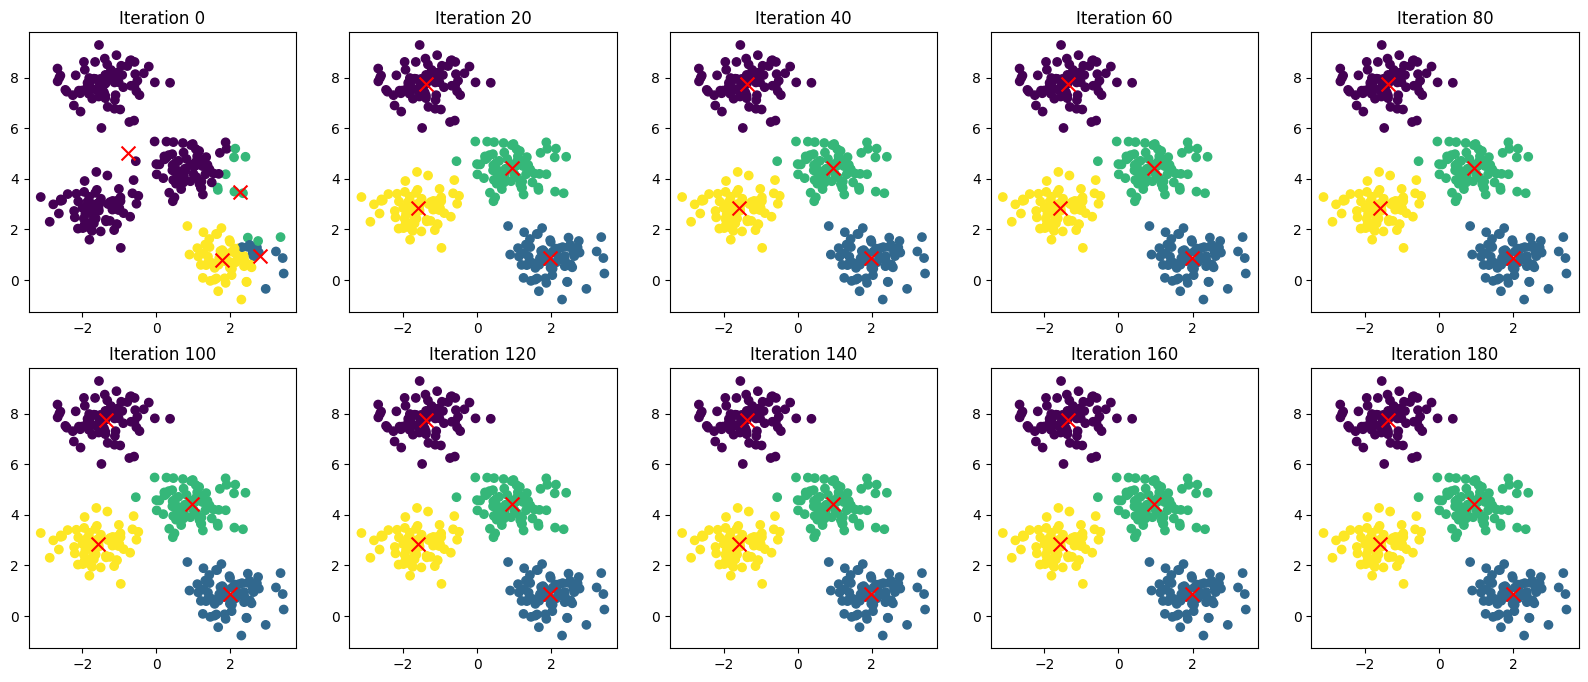

In [42]:
# Simple implementation
from scipy.spatial.distance import cdist, euclidean
from sklearn.datasets import make_blobs
rng = np.random.RandomState()
# load a standard data set for easier visualization
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# specify number of clusters needed
n_clusters = 4

# Some parameters for optimization loop
max_iter = 200
threshold = 1e-2

# we need some initial centers to start out optimization step
centers = X[rng.choice(len(X), n_clusters),...]
fig, axs = plt.subplots(2,5, figsize=(4*5, 4*2))
axs = axs.flatten()
plt_id = 0
for itr in range(max_iter):
    error = 0
    
    # Assignment or Expectation step
    dists = cdist(X, centers)
    labels = np.argmin(dists, axis=1)
    
    # Update or Maximization step
    new_centers = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        new_centers[i,...] = X[labels==i,...].mean(axis=0)
        error += euclidean(centers[i,...], new_centers[i,...])
    centers = new_centers
    
    if (100*itr/max_iter)%10==0:
        ax = axs[plt_id]
        ax.scatter(X[:,0], X[:,1],c=labels)
        ax.scatter(centers[:,0], centers[:,1], 
                   color='red', marker='x', s=100
                  )
        ax.set_title('Iteration %d'%itr)
        plt_id += 1
        
plt.show()        